<a href="https://colab.research.google.com/github/ElaYJ/Study_Deep_Learning/blob/main/Framework/TensorFlow/07_DeepLearning_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep learning Flow

- 변하지 않는 Deep learning Flow 4가지 단계

    <img src="https://github.com/ElaYJ/supplement/assets/153154981/9b816dbd-a8db-4d66-8205-2e86091cf339" width="57%"> </img>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Data 가져오기

- TensorFlow에서 제공하는 MNIST 예제

In [2]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


- 데이터 shape, dtype 확인하기

In [3]:
print(train_x.shape)
print(test_x.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
print(train_y.shape)
print(test_y.shape)

(60000,)
(10000,)


In [5]:
print(train_x.dtype)
print(test_x.dtype)

print(train_y.dtype)
print(test_y.dtype)

uint8
uint8
uint8
uint8


- 데이터 하나만 뽑기

In [6]:
image = train_x[77]
image.shape

(28, 28)

In [7]:
# 만약 차원을 유지하고 싶으면...
train_x[77:78].shape

(1, 28, 28)

- 시각화해서 확인

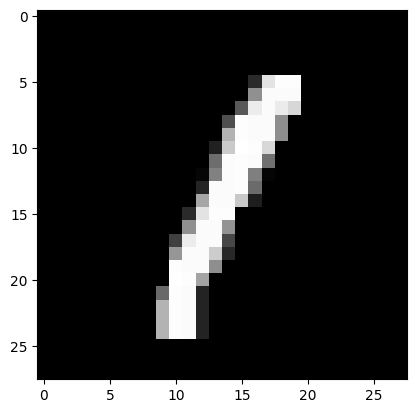

In [8]:
plt.imshow(image, 'gray')
plt.show()

#### 👉 데이터를 받으면 데이터를 이해하기 위해 노력해야합니다!


----

#### ex>  훈련용 데이터셋에는 각 숫자의 그림이 몇개씩 들어가 있나? (QUIZ)

In [10]:
y_unique, y_counts = np.unique(train_y, return_counts=True)
y_unique, y_counts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

* 시각화를 해야 더 잘 보이겠죠?

In [11]:
df_view = pd.DataFrame(data={"count" : y_counts}, index=y_unique)
df_view

,count
0,5923
1,6742
2,5958
3,6131
4,5842
5,5421
6,5918
7,6265
8,5851
9,5949


In [12]:
df_view.sort_values("count", ascending=False)

,count
1,6742
7,6265
3,6131
2,5958
9,5949
0,5923
6,5918
8,5851
4,5842
5,5421


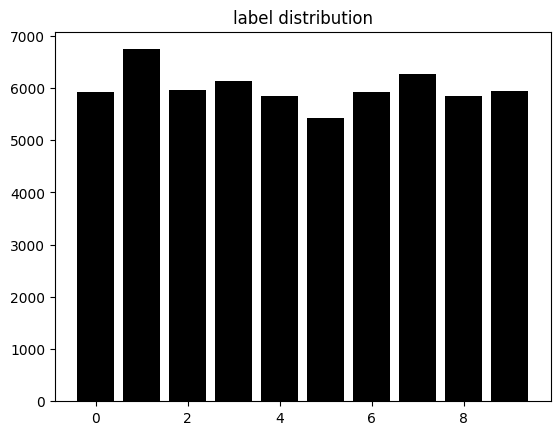

In [13]:
plt.bar(x=y_unique, height=y_counts, color="black")
plt.title("label distribution")
plt.show()

### 막간 퀴즈

- 다음 코드를 완성하여, 아래 이미지를 시계 반대 방향으로 90도 회전하고 아래위를 반전 시키기

In [14]:
image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  42, 228, 253, 253,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 144, 251, 251, 251,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  89, 236, 251, 235, 215,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  79, 253, 251, 251, 142,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 180, 253, 251, 251, 142,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         32, 202, 255, 253, 216,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        109, 251, 253, 251, 112,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
        129, 251, 253, 127,   5,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  37,
        251, 251, 253, 107,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 166,
        251, 251, 201,  30,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 228,
        253, 253,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 144, 251,
        251, 147,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  63, 236, 251,
        251,  71,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 150, 251, 251,
        204,  41,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 253, 251, 251,
        142,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 253, 164,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 105, 253, 251,  35,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 180, 253, 251,  35,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 180, 253, 251,  35,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [15]:
image = tf.constant(image)
image

<tf.Tensor: shape=(28, 28), dtype=uint8, numpy=
array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  42, 228, 253, 253,   0,   0,  

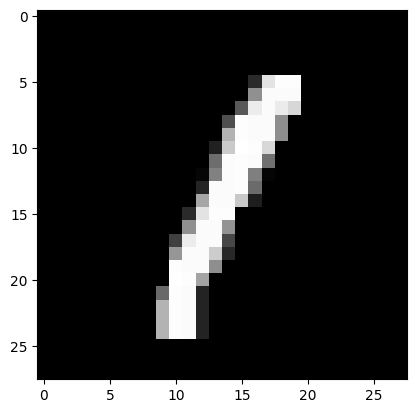

In [16]:
plt.imshow(image, 'gray')
plt.show()

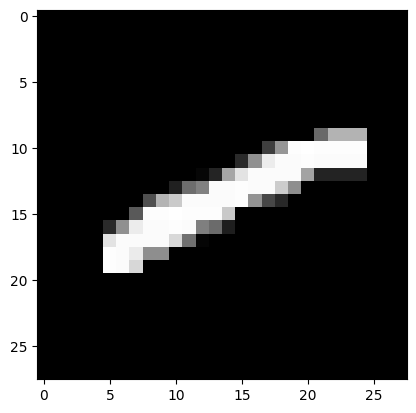

In [17]:
plt.imshow(tf.transpose(image), 'gray')
plt.show()

## 2. Preprocessing

- 모델의 입력값으로 사용할 수 있도록 데이터를 변환하는 작업

- 데이터 전처리 : 데이터 변환 작업

    - 데이터 검증 : 데이터의 유효성 검증
    - 전처리
    - 데이터 증강 ... (이 건 추후에!)

#### 데이터 검증

 - 데이터 중에 학습에 포함 되면 안되는 것이 있는가?

    ex> 개인정보가 들어있는 데이터, 테스트용 데이터에 들어있는것, 중복되는 데이터

 - 학습 의도와 다른 데이터가 있는가?

    ex> 얼굴을 학습하는데 발 사진이 들어가있진 않은지(가끔은 의도하고 일부러 집어넣는 경우도 있음)

 - 라벨이 잘못된 데이터가 있는가?

    ex> 7인데 1로 라벨링, 고양이 인데 강아지로 라벨링
 -  ... 등


In [18]:
def validate_pixel_scale(x):
    return 255 >= x.max() and 0 <= x.min()
    #--> 0 ≤ x ≤ 255 이면 True 반환
    #--> 조건에 만족하지 않으면 False로 해당 데이터는 필터링된다.

In [19]:
validated_train_x = np.array([x for x in train_x if validate_pixel_scale(x)])

validated_train_y = np.array([y for x, y in zip(train_x, train_y) if validate_pixel_scale(x)])

In [20]:
print(validated_train_x.shape)
print(validated_train_y.shape)

(60000, 28, 28)
(60000,)


In [21]:
validated_train_y[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [22]:
train_y[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

#### 전처리

 - 입력하기 전에 모델링에 적합하게 처리!
 - 대표적으로 Scaling, Resizing, label encoding 등이 있다.
 - dtype, shape 항상 체크!!

##### Scaling

In [23]:
def scale(x):
    """
    Make pixels within 0 ~ 1

    return
        scaled image (dtype=float32)
    """
    return (x / 255.0).astype(np.float32)


In [24]:
# unit test
sample = scale(validated_train_x[777])
print(sample.shape, sample.min(), sample.max())

(28, 28) 0.0 1.0


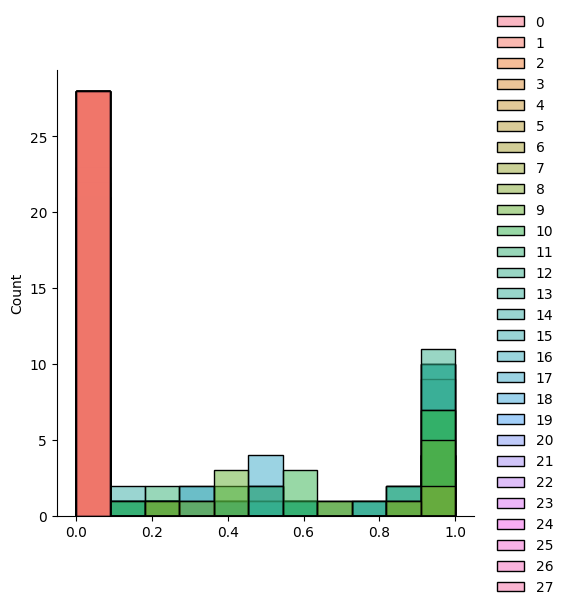

In [25]:
# distribution plot

sns.displot(sample);

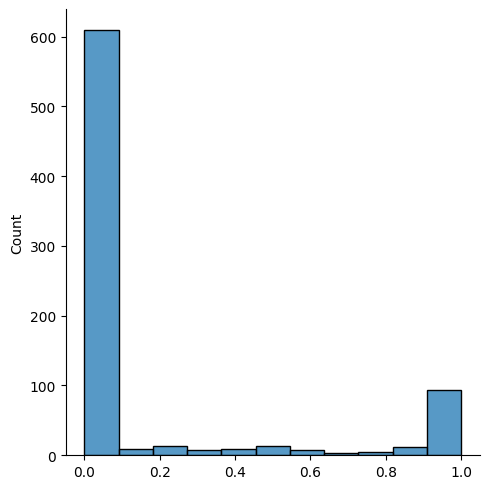

In [26]:
sns.displot(sample.reshape(-1), kde=False)
plt.show()

In [27]:
sample.reshape(-1)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [28]:
scaled_train_x = np.array([scale(x) for x in validated_train_x])

In [29]:
print(scaled_train_x.shape, scaled_train_x.dtype)

(60000, 28, 28) float32


##### Flattening

 - 이번에 사용할 모델은 기본적인 Feed-Forward Neural Network
 - 1차원 벡터가 Input의 샘플 하나가 된다. (2차원 텐서라는 말)

In [30]:
flattend_train_x = train_x.reshape((60000, -1))

In [31]:
flattend_train_x.shape

(60000, 784)

##### Label encoding

 - One-Hot encoding
 - `tf.keras.utils.to_categorical` 사용!

In [32]:
validated_train_y[77]

1

In [33]:
tf.keras.utils.to_categorical(validated_train_y[77], num_classes=10)

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [34]:
ohe_train_y = np.array([tf.keras.utils.to_categorical(y, num_classes=10) for y in validated_train_y])

In [35]:
ohe_train_y.shape

(60000, 10)

### Class화

- 보통은 큰 작업을 하나의 클래스로 만들어서 관리한다.


In [36]:
class DataLoader():
    def __init__(self):
        # data load
        (self.train_x, self.train_y), \
            (self.test_x, self.test_y) = tf.keras.datasets.mnist.load_data()

    def validate_pixel_scale(self, x):
        return 255 >= x.max() and 0 <= x.min()

    def scale(self, x):
        return (x / 255.0).astype(np.float32)

    def preprocess_dataset(self, dataset):
        """
        feature
            shape : (num_data, 28, 28)
        target
            shape : (num_data,)

        return
            feature
                shape : (num_data, 28, 28)
            target
                shape : (num_data,)
        """
        (feature, target) = dataset

        validated_x = np.array([x for x in feature if self.validate_pixel_scale(x)])

        validated_y = np.array([y for x, y in zip(feature, target) if self.validate_pixel_scale(x)])

        # scaling #
        scaled_x = np.array([self.scale(x) for x in validated_x])

        # flattening #
        flattend_x = scaled_x.reshape((scaled_x.shape[0], -1))

        # label encoding #
        ohe_y = np.array([tf.keras.utils.to_categorical(y, num_classes=10) for y in validated_y])

        return flattend_x, ohe_y

    def get_train_dataset(self):
        return self.preprocess_dataset((self.train_x, self.train_y))

    def get_test_dataset(self):
        return self.preprocess_dataset((self.test_x, self.test_y))

In [37]:
mnist_loader = DataLoader()

In [38]:
train_x, train_y = mnist_loader.get_train_dataset()

In [39]:
print(train_x.shape, train_x.dtype)
print(train_y.shape, train_y.dtype)

(60000, 784) float32
(60000, 10) float32


In [40]:
test_x, test_y = mnist_loader.get_test_dataset()

In [41]:
print(test_x.shape, test_x.dtype)
print(test_y.shape, test_y.dtype)

(10000, 784) float32
(10000, 10) float32


## 3. Modeling
 1. 모델 정의
 2. 학습 로직 - 비용함수, 학습파라미터 세팅
 3. 학습 수행


#### 모델 정의

- Dense layer는 Feed-Forward Neural Network 그 자체임.

In [42]:
from tensorflow.keras.layers import Dense, Activation

In [43]:
model = tf.keras.Sequential()
model.add(Dense(15, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(10, input_dim=784))
model.add(Activation('softmax'))

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                11775     
                                                                 
 activation (Activation)     (None, 15)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 11935 (46.62 KB)
Trainable params: 11935 (46.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 학습 로직

In [45]:
opt = tf.keras.optimizers.SGD(learning_rate=0.03)
loss = tf.keras.losses.categorical_crossentropy

In [46]:
model.compile(optimizer=opt, loss=loss, metrics=["accuracy"])

#### 학습 실행

In [47]:
batch_size = 128 # default=32
epochs = 10

In [48]:
hist = model.fit(train_x,
                 train_y,
                 batch_size=batch_size,
                 epochs=epochs)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 1.9566 - accuracy: 0.4949
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 1.3674 - accuracy: 0.7039
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 1.0209 - accuracy: 0.7703
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.8210 - accuracy: 0.8140
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.6943 - accuracy: 0.8456
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.6082 - accuracy: 0.8651
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.5470 - accuracy: 0.8758
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.5021 - accuracy: 0.8837
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.4681 - accuracy: 0.8886
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.4415 - accuracy: 0.8927

In [50]:
hist

In [49]:
hist.history

{'loss': [1.9565871953964233,
  1.3674465417861938,
  1.0208548307418823,
  0.8210417032241821,
  0.6942750811576843,
  0.6081894040107727,
  0.5470184087753296,
  0.5021161437034607,
  0.46806809306144714,
  0.4414634108543396],
 'accuracy': [0.4949333369731903,
  0.7039333581924438,
  0.7702500224113464,
  0.8140333294868469,
  0.8456166386604309,
  0.8651333451271057,
  0.8757500052452087,
  0.8837166428565979,
  0.888616681098938,
  0.8927000164985657]}

## 4. Evaluation

- 학습 과정 추적
- Test / 모델 검증
- 후처리

##### 학습 과정 추적

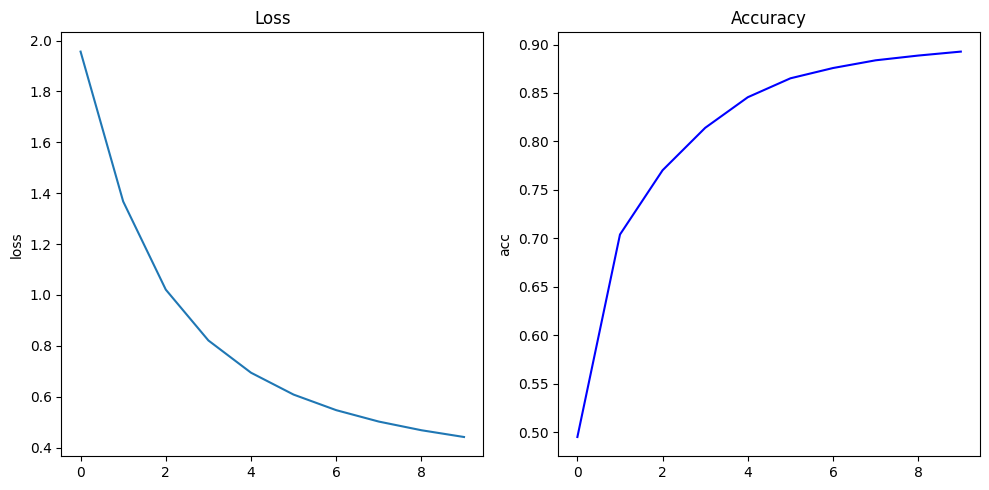

In [51]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(hist.history['loss'])
plt.title("Loss")
plt.ylabel("loss")
plt.subplot(122)
plt.plot(hist.history['accuracy'], 'b-')
plt.title("Accuracy")
plt.ylabel("acc")
plt.tight_layout()
plt.show()

##### 모델 검증

In [52]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 2s 6ms/step - loss: 0.4178 - accuracy: 0.8968


[0.4178430736064911, 0.8967999815940857]

##### 후처리

In [53]:
test_x[:1].shape

(1, 784)

In [54]:
prediction_sample = model.predict(test_x[:1])
prediction_sample

1/1 [==============================] - 0s 160ms/step


array([[3.2527708e-03, 1.3375310e-03, 8.1509689e-04, 1.1804024e-02,
        1.0878468e-03, 3.4668983e-03, 1.6608545e-05, 9.6551627e-01,
        9.7628590e-04, 1.1726638e-02]], dtype=float32)

In [55]:
np.argmax(prediction_sample)

7

In [56]:
sample_image = test_x[0].reshape((28, 28)) * 255

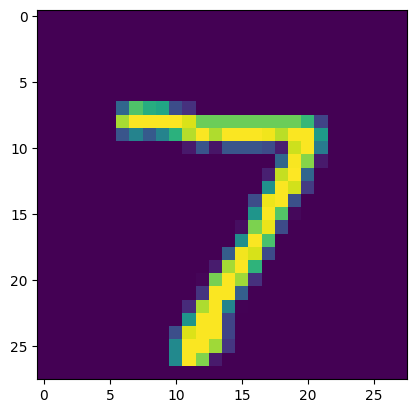

In [59]:
plt.imshow(sample_image)#, cmap='gray'
plt.show()